In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

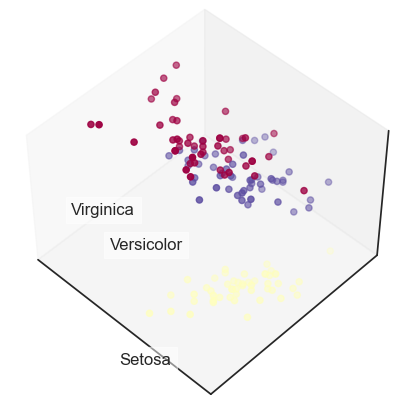

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y_clr = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.Spectral)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.88889


In [11]:
pca = decomposition.PCA(n_components=2)
X_centred = X - X.mean(axis=0)
pca.fit(X_centred)
X_pca = pca.transform(X_centred)

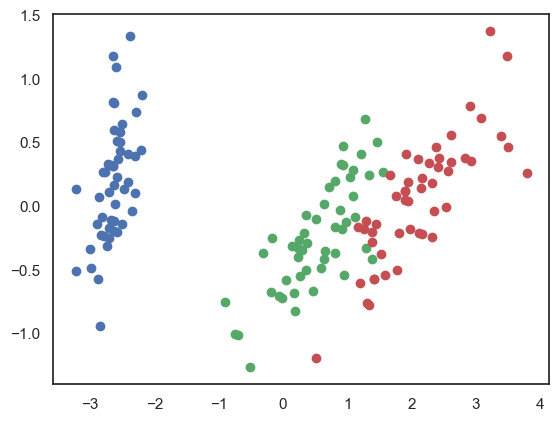

In [12]:
plt.plot(X_pca[y==0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y==1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y==2, 0], X_pca[y == 2, 1], 'ro', label='Setosa')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, stratify=y, random_state=42)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111
